<a href="https://colab.research.google.com/github/nechebarrena/HOML/blob/main/HOML_cap_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CAPITULO 10 - HANDS ON MACHINE LEARNING**
## **Una introduccion a las redes neuronales con Keras**



En este capitulo vamos a introducir por primera vez la API Keras. En particular vamos a utilizar la implementacion para TensorFlow.

In [50]:
!python3 -m pip install --upgrade tensorflow

In [51]:
import tensorflow as tf
from tensorflow import keras
print('Version de Tensor Flow ==> ',tf.__version__)
print('Version de Keras ==> ',keras.__version__)

Version de Tensor Flow ==>  2.5.0
Version de Keras ==>  2.5.0


La version de keras no termina con un -tf tal como dice el libro. ¿Por que?

Vamos a tratar de resolver un problema de clasificacion de imagenes. En particular vamos a trabajar con un dataset incluido en Keras.

In [52]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full),(X_test,y_test) = fashion_mnist.load_data()

Forma del dataset =  (60000, 28, 28)
Maximo =  255  Minimo =  0
[0 1 2 3 4 5 6 7 8 9]


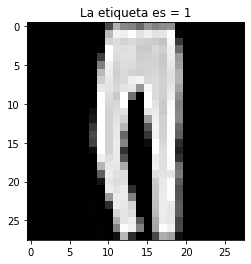

In [53]:
print('Forma del dataset = ',X_train_full.shape)
import matplotlib.pyplot as plt
import numpy as np
N = 285
plt.figure()
plt.imshow(X_train_full[N],cmap='gray', vmin=0, vmax=255)
plt.title("La etiqueta es = " +  str(int(y_train_full[N])))
print("Maximo = ",X_train_full.max()," Minimo = ",X_train_full.min())
print(np.unique(y_train_full))

En total tenemos $60$ mil imagenes en el conujunto de train. Las imagenes son matrices de $28 \times 28$ que representan prendas de vestir. Cada elemento de imagen tiene un valor que va entre $0$ y $255$. En total tenemos $10$ clases que debemos poder clasificar. Estas clases estan etiquetadas por un entero entre $[0,9]$.

A su vez ya podemos notar que tenemos una division entre Train y Test pero no tenemos un conjunto de validacion. Vamos a hacer este split y ademas vamos a normalizar los valores llevandolos del $[0,255] \rightarrow [0,1]$.

In [54]:
X_valid = X_train_full[:5000]/255
X_train = X_train_full[5000:]/255
y_valid = y_train_full[:5000]
y_train = y_train_full[5000:]
print(len(X_train))
print(len(X_valid))

55000
5000


Las clases el libro dicen que son las siguientes:

Text(0.5, 1.0, 'La etiqueta es = Bolso')

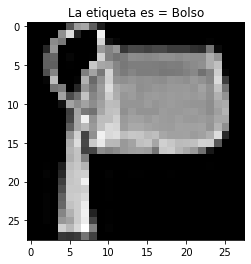

In [55]:
class_names = ["Remera","Pantalon","Pullover","Vestido","Saco","Sandalia","Camisa","Zapatilla","Bolso","Bota"]
plt.figure()
plt.imshow(X_train[N],cmap='gray', vmin=0, vmax=1)
plt.title("La etiqueta es = " +  class_names[y_train[N]])

Vamos a crear una red usando un diseño secuencial.

In [56]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(128,activation="relu"))
#model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
#model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5,validation_data=(X_valid, y_valid))

Epoch 1/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7592 - accuracy: 0.7543 - val_loss: 0.5512 - val_accuracy: 0.8198
Epoch 2/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5237 - accuracy: 0.8220 - val_loss: 0.4887 - val_accuracy: 0.8380
Epoch 3/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4741 - accuracy: 0.8376 - val_loss: 0.4597 - val_accuracy: 0.8414
Epoch 4/5
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4466 - accuracy: 0.8457 - val_loss: 0.4345 - val_accuracy: 0.8564
Epoch 5/5
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4283 - accuracy: 0.8513 - val_loss: 0.4246 - val_accuracy: 0.8540


{'loss': [0.759166419506073, 0.523712694644928, 0.47414952516555786, 0.44661110639572144, 0.42831143736839294], 'accuracy': [0.7542545199394226, 0.8219636082649231, 0.8375999927520752, 0.845690906047821, 0.8513454794883728], 'val_loss': [0.5511776804924011, 0.48867544531822205, 0.4597190320491791, 0.4345438480377197, 0.424618124961853], 'val_accuracy': [0.8198000192642212, 0.8379999995231628, 0.8414000272750854, 0.8564000129699707, 0.8539999723434448]}


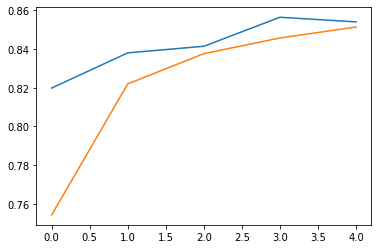

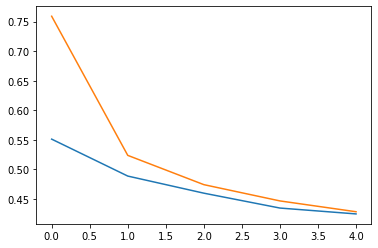

In [58]:
print(history.history)
plt.figure()
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])

plt.figure()
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])

Mirar con un poco mas de detalle este grafico porque parece que las mediciones del accuracy sobre el test y sobre el train no estan hechas al mismo tiempo. O sea, tendria que hacer un shift de la alguna de las dos curvas para poder compararlas correctamente. (Pagina 398 del libro)

Vamos a evaluar el modelo sobre el test. Primero vamos a buscar el reporte de clasificacion que calcula Scikit-Learn y luego dibujar una matriz de confusion.

In [59]:
y_test_pred = model.predict(X_test)
evaluacion = model.evaluate(X_test, y_test)
print(evaluacion)
import pandas as pd
from sklearn.metrics import precision_score, recall_score, classification_report 
y_test_pred_categorical = np.argmax(y_test_pred, axis=-1)
reporte = classification_report(y_test, y_test_pred_categorical, target_names=class_names)
print(reporte)


313/313 [==============================] - 1s 2ms/step - loss: 77.2579 - accuracy: 0.8068
[77.2579345703125, 0.8068000078201294]
              precision    recall  f1-score   support

      Remera       0.80      0.82      0.81      1000
    Pantalon       0.97      0.96      0.97      1000
    Pullover       0.81      0.55      0.66      1000
     Vestido       0.86      0.84      0.85      1000
        Saco       0.58      0.92      0.71      1000
    Sandalia       0.99      0.68      0.81      1000
      Camisa       0.66      0.48      0.56      1000
   Zapatilla       0.86      0.89      0.88      1000
       Bolso       0.90      0.95      0.93      1000
        Bota       0.78      0.97      0.86      1000

    accuracy                           0.81     10000
   macro avg       0.82      0.81      0.80     10000
weighted avg       0.82      0.81      0.80     10000



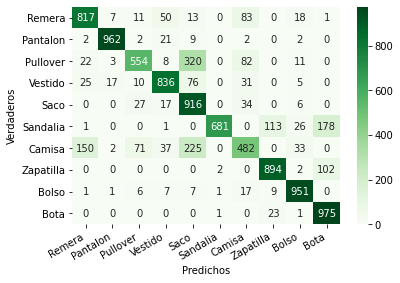

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred_categorical)

import seaborn as sns
import pandas as pd
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Greens")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('Verdaderos')
  plt.xlabel('Predichos');
clases = ('OTROS','CINCOS')

df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure()
show_confusion_matrix(df_cm)

Ahora vamos a probar lo mismo pero sobre el conjunto de validacion.

              precision    recall  f1-score   support

      Remera       0.75      0.85      0.80       457
    Pantalon       0.98      0.96      0.97       556
    Pullover       0.84      0.60      0.70       504
     Vestido       0.85      0.88      0.87       501
        Saco       0.74      0.84      0.78       488
    Sandalia       0.96      0.93      0.94       493
      Camisa       0.63      0.63      0.63       493
   Zapatilla       0.93      0.93      0.93       512
       Bolso       0.93      0.96      0.94       490
        Bota       0.93      0.95      0.94       506

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.86      0.85      0.85      5000



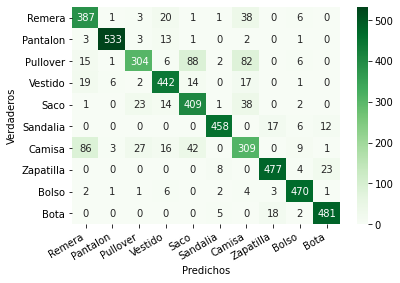

In [61]:
y_valid_pred = model.predict(X_valid)
y_valid_pred_categorical = np.argmax(y_valid_pred, axis=-1)
reporte = classification_report(y_valid, y_valid_pred_categorical, target_names=class_names)
print(reporte)
cm = confusion_matrix(y_valid, y_valid_pred_categorical)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure()
show_confusion_matrix(df_cm)

Las clases en este problema estan bien balanceadas, pero podria no ser el caso. Para arreglar este eventual problema se puede solucionar cambiando los pesos sobre la funcion de _loss_. Para hacer esto no es necesario modificar a mano esta funcion sino que podemos pasar los pesos bajo el parametro _class_weight_ del metodo _fit_. De hecho, no solo podemos darle mayor peso relativo a una clase por sobre otra sino que podemos darle mas peso a una instancia particular por sobre otras. Esto puede ser util si la calidad de las etiquetas de cada instancia no es uniforme. Por ejmplo podriamos tener etiquetas elaboradas por un experto y otras elaboradas con algun metodo automatico de menor calidad. En este caso nos gustaria darle mayor peso a las etiquetas elaboradas por el experto. Esto se puede hacer mediante el parametro _sample_weight_ tambien del metodo _fit_.

(ESTARIA BUENO HACER UNA PRUEBA DE ESTO)

In [62]:
model.evaluate(X_test, y_test)
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 0.4246 - accuracy: 0.8540


[0.424618124961853, 0.8539999723434448]

[4.1277158e-01 4.5884587e-02 2.4133086e-02 2.7275810e-01 2.8897405e-03
 1.1630815e-05 2.4073207e-01 5.2095875e-05 7.5838569e-04 8.8060651e-06]
La clase de la instancia 3 es  0   O sea, un/a  Remera


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


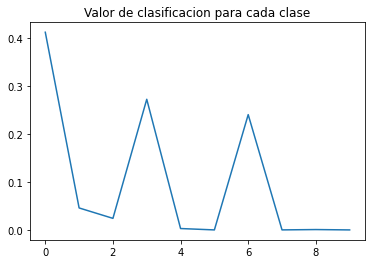

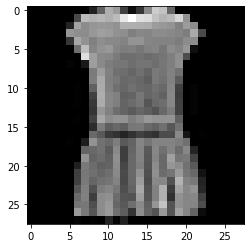

In [63]:
N = 3
plt.figure()
plt.plot(y_valid_pred[N])
plt.title('Valor de clasificacion para cada clase')
print(y_valid_pred[N])
clase = model.predict_classes(X_valid[N:N+1])
print('La clase de la instancia',N,'es ',clase[0], '  O sea, un/a ',class_names[clase[0]])
plt.figure()
plt.imshow(X_valid[N],cmap='gray')

Notar que el metodo _predict_classes()_ esta deprecado y en su lugar use _np.argmax()_ tal como use antes. 

In [64]:
resultados = model.predict(X_valid)
suma = np.sum(resultados ,  axis=1)
print('Minimo = ',suma.min())
print('Maximo = ',suma.max())

Minimo =  0.99999976
Maximo =  1.0000002


Tambien tenemos que notar que la suma de los valores de cada clase esta normalizada a UNO, con lo cual podemos pensar en estos como los valores de probabilidad de pertenecer a dicha clase. O sea, si por ejemplo cuando hacemos la prediccion nos arroja un valor de $0.4$ para una clase y $0.6$ para otra, podemos pensar que existe un $40\%$ de probabilidades de que sea de esta clase un $60\%$ de que sea de la otra. Sin embargo esta probabilidad no esta asociada al concepto frecuentista de la misma. O sea, a priori, no significa que si obtego estos valores para 100 instancias distintas esto signifique que 40 de ellas van a pertenecer a dicha clase. Uno puede buscar esta propiedad pero para eso no basta con el entrenamiento realizado sobre la red, para esto se debe realizar un proceso de calibracion que por ahora queda como tema pendiente. No se si el libro lo tratara mas adelante.

Ahora vamos a utilizar una red armada con el modulo secuencial, igual que el caso anterior, pero en este caso para realizar una tarea de regresion. Para eso vamos a utilizar solo una neurona de salida, pues queremos que el resultado de la red sea solo un valor numerico. La tarea de regresion que vamos a realizar es sobre el dataset del capitulo 2. Vamos a intentar hacer una regresion sobre el precio de las propiedades en California. Para eso vamos a descargar el dataset utilizando Scikit-Learn.

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)


print(pd.DataFrame(X_train).describe())
print(pd.DataFrame(X_train).info())
print(housing.DESCR)

                  0             1  ...             6             7
count  11610.000000  11610.000000  ...  11610.000000  11610.000000
mean       3.868149     28.653661  ...     35.605911   -119.542890
std        1.900451     12.639274  ...      2.133056      1.994064
min        0.499900      1.000000  ...     32.540000   -124.220000
25%        2.556200     18.000000  ...     33.930000   -121.750000
50%        3.530350     29.000000  ...     34.230000   -118.470000
75%        4.746975     37.000000  ...     37.710000   -118.000000
max       15.000100     52.000000  ...     41.950000   -114.310000

[8 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11610 entries, 0 to 11609
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       11610 non-null  float64
 1   1       11610 non-null  float64
 2   2       11610 non-null  float64
 3   3       11610 non-null  float64
 4   4       11610 non-null  float64
 5   5  

Vemos que el dataset es "ideal" para realizar un ejemplo de regresion sencillo ya que no tiene valores nulos, no tiene atributos categoricos, etc etc. O sea, solo necesitamos realizar una normalizacion de los valores de los distintos atributos y listo. 

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)